# Fire Up OpenCV, Numpy, Matplotlib, Scikit-learn

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing

# Load Image

/home/chentao/Software/Anaconda3/envs/opencv/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


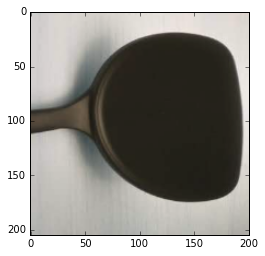

In [2]:
img = cv2.imread('/home/chentao/Pictures/spatula.png')
flat_img = img.reshape(-1,3)
flat_img = preprocessing.scale(flat_img)
plt.imshow(img)
plt.show()

# Spectral Clustering

In [4]:
# very very slow
from sklearn.cluster import spectral_clustering
from sklearn.feature_extraction import image
mask = img.astype(bool)
# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(img, mask=mask)

# Take a decreasing function of the gradient: we take it weakly
# dependent from the gradient the segmentation is close to a voronoi
graph.data = np.exp(-graph.data / graph.data.std())
# Force the solver to be arpack, since amg is numerically
# unstable on this example
labels = spectral_clustering(graph, n_clusters=2, eigen_solver='arpack')
label_im = -np.ones(mask.shape)
label_im[mask] = labels

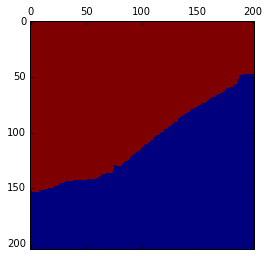

In [5]:
plt.matshow(label_im[:,:,2])
plt.show()

# KMeans

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(flat_img)
y = kmeans.predict(flat_img)

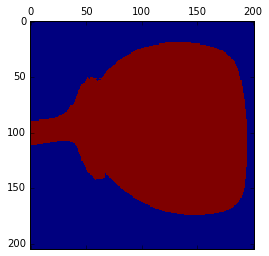

In [4]:
plt.matshow(y.reshape(img.shape[:2]))
plt.show()

# Affinity Propagation

In [5]:
from sklearn.cluster import AffinityPropagation
affPro = AffinityPropagation(damping = 0.8)
affPro.fit(flat_img)
y = affPro.labels_

MemoryError: 

In [ ]:
plt.matshow(y.reshape(img.shape[:2]))
plt.show()

# MeanShift

In [6]:
# a little bit slow
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(flat_img, quantile=0.4, n_samples=7000)
mshift = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=-1)
mshift.fit(flat_img)
y = mshift.labels_

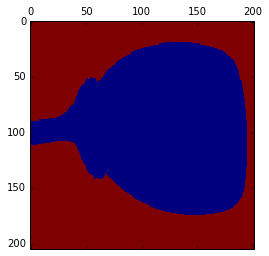

In [7]:
plt.matshow(y.reshape(img.shape[:2]))
plt.show()

# Agglomerative Clustering

In [8]:
# slow
from sklearn.cluster import AgglomerativeClustering

aggcluster = AgglomerativeClustering(n_clusters=2, affinity='cosine', \
                                     compute_full_tree='auto', linkage='complete')
aggcluster.fit(flat_img)
y = aggcluster.labels_

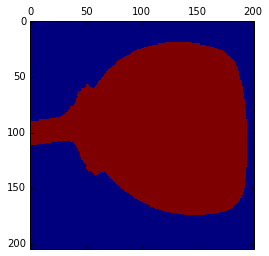

In [9]:
plt.matshow(y.reshape(img.shape[:2]))
plt.show()

# DBSCAN

In [10]:
# slow
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.035, min_samples=20).fit(flat_img)
#db = DBSCAN(eps=0.06, min_samples=15).fit(flat_img)
y = db.labels_

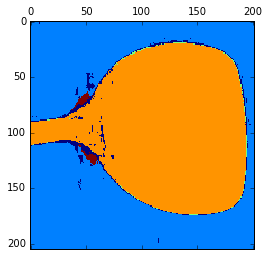

In [11]:
plt.matshow(y.reshape(img.shape[:2]))
plt.show()

In [12]:
from scipy import stats
m = stats.mode(y)
print("Mode of labels: ", m[0])

Mode of labels:  [0]


# GMM

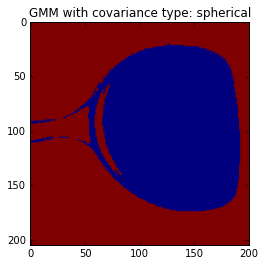

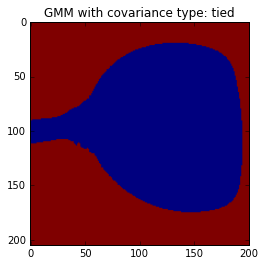

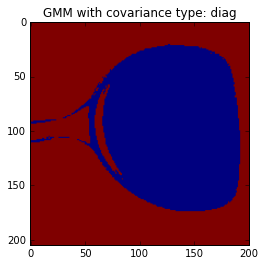

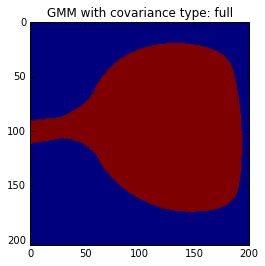

In [13]:
from sklearn.mixture import GMM
cov_types = ['spherical','tied','diag','full']
for i, cov in enumerate(cov_types):
    gmm = GMM(n_components = 2, covariance_type = cov)
    gmm.fit(flat_img)
    y = gmm.predict(flat_img)
    plt.title("GMM with covariance type: {:s}".format(cov))
    plt.imshow(y.reshape(img.shape[:2]))
    plt.show()

# VBGMM

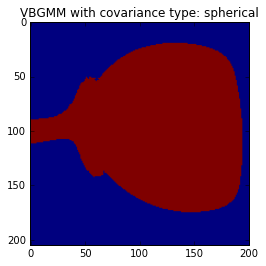

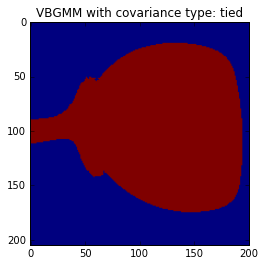

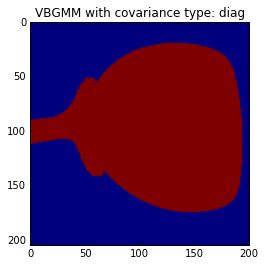

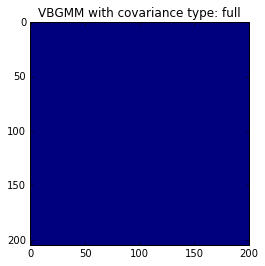

In [14]:
from sklearn.mixture import VBGMM
cov_types = ['spherical','tied','diag','full']
for i, cov in enumerate(cov_types):
    gmm = VBGMM(n_components = 2, covariance_type = cov)
    gmm.fit(flat_img)
    y = gmm.predict(flat_img)
    plt.title("VBGMM with covariance type: {:s}".format(cov))
    plt.imshow(y.reshape(img.shape[:2]))
    plt.show()

# DPGMM

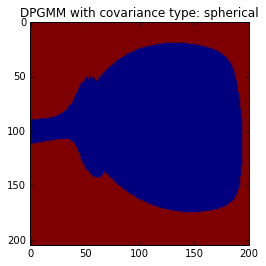

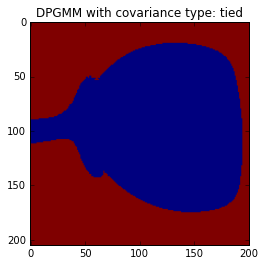

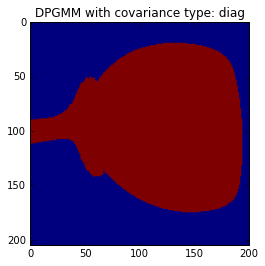

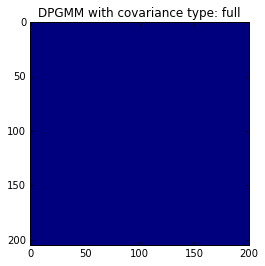

In [15]:
from sklearn.mixture import DPGMM
cov_types = ['spherical','tied','diag','full']
for i, cov in enumerate(cov_types):
    gmm = DPGMM(n_components = 2, covariance_type = cov)
    gmm.fit(flat_img)
    y = gmm.predict(flat_img)
    plt.title("DPGMM with covariance type: {:s}".format(cov))
    plt.imshow(y.reshape(img.shape[:2]))
    plt.show()

# Birch

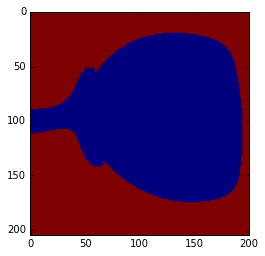

In [16]:
# a little bit slow
from sklearn.cluster import Birch
brc = Birch(branching_factor=50, n_clusters=2, threshold=0.8,compute_labels=True)
brc.fit(flat_img)
y = brc.labels_
plt.imshow(y.reshape(img.shape[:2]))
plt.show()